In [158]:
# GD-ga ühendamine
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Keras
from keras.models import load_model
from keras.layers import Dense, Input, BatchNormalization, LayerNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping


In [160]:
failinimi = 'boardgames1.csv'
mangud = pd.read_csv(failinimi, delimiter=",")

In [161]:
mangud.describe()

,objectid,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,max_community,totalvotes,languagedependence,usersrated,average,baverage,stddev,avgweight,numweights,numgeeklists,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,14141.000000,14803.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,88667.61500,1981.268700,10000.500000,2.055250,5.59215,68.096450,94.28945,9.476350,3.203522,4.277917,13.461350,1.35465,739.616350,6.275440,5.297689,1.499691,1.931761,48.059050,244.243000,40.097900,39.376050,191.515100,7.632353e+04,2304.163050,16.018050,0.518000,10.146900,6.255150,1.943050,1.339200,1.379250,2.500100,0.436000,2.568050,2.306900,1.185750,3.392800,1.429500
std,90640.91959,219.223277,5773.647028,0.745537,15.04921,466.502106,1005.75196,3.738842,1.398935,2.155624,57.169377,1.39713,3096.843206,1.065339,1.494174,0.340743,0.897206,198.113638,1079.125263,94.094807,113.503485,606.892077,2.252393e+05,13625.576506,111.374578,1.282754,38.772952,11.053866,7.956222,0.787003,4.768926,5.082961,1.609824,1.366515,1.707764,6.809425,12.317236,1.728375
min,1.00000,-3500.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.830000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5858.75000,1997.000000,5000.750000,2.000000,4.00000,20.000000,30.00000,8.000000,2.000000,3.000000,1.000000,0.00000,47.000000,5.712777,5.502933,1.309920,1.255050,4.000000,24.000000,4.000000,2.000000,21.000000,1.163450e+04,55.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,39278.50000,2008.000000,10000.500000,2.000000,4.00000,30.000000,45.00000,10.000000,3.000000,4.000000,3.000000,1.00000,105.000000,6.354170,5.545040,1.471575,1.910900,9.000000,59.000000,12.000000,8.000000,44.000000,2.366050e+04,177.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,2.000000,1.000000
75%,169680.50000,2015.000000,15000.250000,2.000000,6.00000,60.000000,90.00000,12.000000,4.000000,5.000000,7.000000,2.00000,333.250000,6.955793,5.674960,1.663783,2.500000,25.000000,178.000000,35.000000,26.000000,122.000000,5.791975e+04,703.250000,3.000000,1.000000,6.000000,7.000000,1.000000,2.000000,2.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.000000,2.000000
max,295770.00000,2021.000000,20000.000000,10.000000,999.00000,60000.000000,120000.00000,25.000000,31.000000,31.000000,1868.000000,5.00000,90730.000000,9.442860,8.584240,4.500000,5.000000,7104.000000,121243.000000,2311.000000,2068.000000,17143.000000,8.933078e+06,627501.000000,5694.000000,30.000000,1158.000000,212.000000,577.000000,21.000000,508.000000,174.000000,50.000000,14.000000,18.000000,444.000000,1002.000000,86.000000


In [162]:
def drop_bad_columns(df):
    # Tugevalt varieeruvad, nullväärtustega, väga hõredate andmetega jms puudustega tunnused,
    # eemaldame need kõik ja tagastame andmestiku kus ei ole müra tekitavaid tunnuseid
    bad_columns = ['yearpublished', 'objectid', 'name', 'min_community', 'max_community', 'label',
                   'playerage', 'totalvotes', 'sortindex', 'boardgamedesigner',
                   'boardgamehonor', 'boardgamecategory', 'boardgamemechanic', 
                   'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink',
                   'boardgameartist', 'boardgamepublisher', 'boardgameversion']
    df = df[df['usersrated'] > 0]
    return df.drop(columns=bad_columns)
mangud = drop_bad_columns(mangud)
mangud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19905 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   minplayers              19905 non-null  int64  
 1   maxplayers              19905 non-null  int64  
 2   minplaytime             19905 non-null  int64  
 3   maxplaytime             19905 non-null  int64  
 4   minage                  19905 non-null  int64  
 5   languagedependence      19905 non-null  int64  
 6   usersrated              19905 non-null  int64  
 7   average                 19905 non-null  float64
 8   baverage                19905 non-null  float64
 9   stddev                  19905 non-null  float64
 10  avgweight               19905 non-null  float64
 11  numweights              19905 non-null  int64  
 12  numgeeklists            19905 non-null  int64  
 13  numtrading              19905 non-null  int64  
 14  numwanting              19905 non-null

In [163]:
#pipe = Pipeline(steps=[('scaler', MinMaxScaler())])

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = mangud.drop('average', 1)
y = mangud['average'].values.reshape(-1,1)
y = y_scaler.fit_transform(y)

applicable = list(X.columns)
X[applicable] = X_scaler.fit_transform(X[applicable])



#mangud.describe()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(16122, 31) (16122, 1)
(1991, 31) (1991, 1)
(1792, 31) (1792, 1)


In [164]:
mdl = Sequential()

mdl.add(Dense(128, activation="selu", input_shape=(X.shape[1],)))
mdl.add(LayerNormalization())
mdl.add(Dense(64, activation="relu"))
mdl.add(LayerNormalization())
mdl.add(Dense(16, activation="elu"))
mdl.add(LayerNormalization())
mdl.add(Dense(8, activation="elu"))
mdl.add(LayerNormalization())
mdl.add(Dense(1, activation="sigmoid"))
    
mdl.compile(loss='mean_squared_error', optimizer='adamax')

In [165]:
#callback = EarlyStopping(patience=10)
hist = mdl.fit(X_train, y_train, validation_data = (X_val, y_val), 
                   epochs=512, batch_size=16, verbose=True)#, callbacks=callback)

Epoch 1/512
1008/1008 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 2/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 3/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0066 - val_loss: 0.0080
Epoch 4/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 5/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 6/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 7/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 8/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 9/512
1008/1008 [==============================] - 3s 3ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 10/512
1008/1008 [==============================] - 3s 3ms/step - l

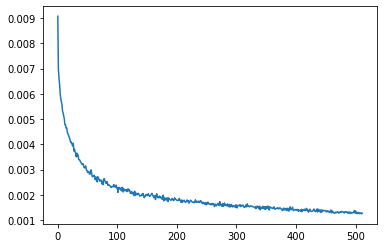

In [166]:
mdl.save('mangud.h5')
plt.plot(hist.history["loss"])

In [167]:
y_parim = mdl.predict(X_test)
real_p = y_scaler.inverse_transform(y_parim)
real_t = y_scaler.inverse_transform(y_test)

print("Normaliseerimata andmetel ennustuste keskmine absoluutviga: ",
      mean_absolute_error(real_p, real_t))

print()
print("Ennustatud väärtus vs õige väärtus (Normaliseeritud)")
print()
for i in range(20):
    print(y_parim[i], y_test[i])

print()
print("Ennustatud väärtus vs õige väärtus (Normaliseerimata)")
print()
for i in range(20):
    print(real_p[i], real_t[i])
    

Normaliseerimata andmetel ennustuste keskmine absoluutviga:  0.195442968154209

Ennustatud väärtus vs õige väärtus (Normaliseeritud)

[0.5022747] [0.22109451]
[0.6703428] [0.66598167]
[0.6307224] [0.62782991]
[0.4225878] [0.47377311]
[0.6328492] [0.66267829]
[0.74005985] [0.73773224]
[0.60821736] [0.6034602]
[0.73438823] [0.73852818]
[0.50668466] [0.50296582]
[0.6633714] [0.68284325]
[0.5938272] [0.62108693]
[0.64264685] [0.63406358]
[0.77015865] [0.77256167]
[0.503193] [0.44276939]
[0.5104587] [0.50274315]
[0.6103136] [0.60506274]
[0.49017742] [0.48690491]
[0.6489674] [0.61102754]
[0.6298202] [0.60419455]
[0.44762695] [0.44352743]

Ennustatud väärtus vs õige väärtus (Normaliseerimata)

[5.240635] [2.86667]
[6.6596103] [6.62279]
[6.325101] [6.30068]
[4.5678496] [5.]
[6.343057] [6.5949]
[7.2482214] [7.22857]
[6.1350937] [6.09493]
[7.200337] [7.23529]
[5.2778673] [5.24647]
[6.6007514] [6.76515]
[6.0135994] [6.24375]
[6.425777] [6.35331]
[7.5023413] [7.52263]
[5.248388] [4.73824]
[5.30973